### `Linear Regression`

In [122]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
# Reading the data from local machine
cars=pd.read_csv("./cars.csv")

In [124]:
cars.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [125]:
cars.shape   # (Rows,columns)

(32, 12)

In [126]:
print("Number of Rows in the data",cars.shape[0])   # 0 is index
print("Number of Columns in the data",cars.shape[1])# 1 is index

Number of Rows in the data 32
Number of Columns in the data 12


In [127]:
cars.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [128]:
# Checking the null values
cars.isnull().sum()

car_model    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

In [129]:
# full information of the dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   car_model  32 non-null     object 
 1   mpg        32 non-null     float64
 2   cyl        32 non-null     int64  
 3   disp       32 non-null     float64
 4   hp         32 non-null     int64  
 5   drat       32 non-null     float64
 6   wt         32 non-null     float64
 7   qsec       32 non-null     float64
 8   vs         32 non-null     int64  
 9   am         32 non-null     int64  
 10  gear       32 non-null     int64  
 11  carb       32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [130]:
cars.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [131]:
cars['am'].value_counts()

0    19
1    13
Name: am, dtype: int64

In [132]:
cars['gear'].value_counts()

3    15
4    12
5     5
Name: gear, dtype: int64

In [133]:
cars['carb'].value_counts()

4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64

In [134]:
cars['vs'].value_counts()

0    18
1    14
Name: vs, dtype: int64

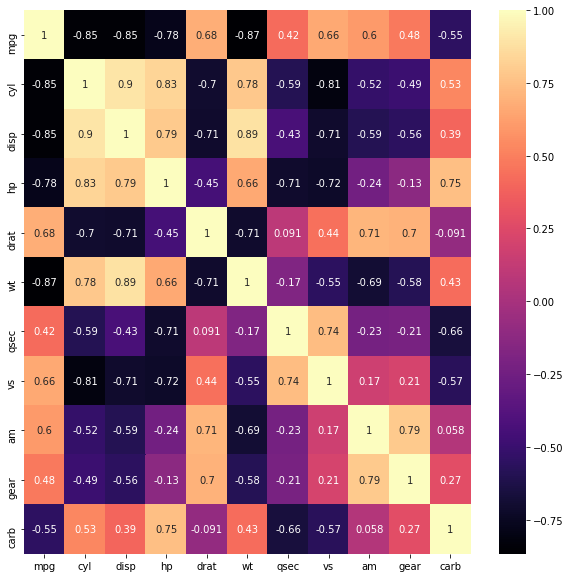

In [135]:
# Correlation
plt.figure(figsize=(10,10))   # width and height
sns.heatmap(cars.corr(),cmap='magma',annot=True);

Multicollinearity -- Similar range values (any one willbe considered)

similar range (<0.05)

In [136]:
# Mentioning the Independent variable and dependent variable
x=cars.loc[:,['wt','drat','hp','am','gear','carb','qsec']]  # Independent variable
y=cars.loc[:,'mpg']  # Dependent variable

In [137]:
x

,wt,drat,hp,am,gear,carb,qsec
0,2.620,3.90,110,1,4,4,16.46
1,2.875,3.90,110,1,4,4,17.02
2,2.320,3.85,93,1,4,1,18.61
3,3.215,3.08,110,0,3,1,19.44
4,3.440,3.15,175,0,3,2,17.02
5,3.460,2.76,105,0,3,1,20.22
6,3.570,3.21,245,0,3,4,15.84
7,3.190,3.69,62,0,4,2,20.00
8,3.150,3.92,95,0,4,2,22.90
9,3.440,3.92,123,0,4,4,18.30


In [138]:
y

0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64

In [139]:
# splitting into training and testing data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state = 12)

In [140]:
x_train

,wt,drat,hp,am,gear,carb,qsec
21,3.520,2.76,150,0,3,2,16.87
8,3.150,3.92,95,0,4,2,22.90
19,1.835,4.22,65,1,4,1,19.90
0,2.620,3.90,110,1,4,4,16.46
10,3.440,3.92,123,0,4,4,18.90
29,2.770,3.62,175,1,5,6,15.50
31,2.780,4.11,109,1,4,2,18.60
30,3.570,3.54,335,1,5,8,14.60
13,3.780,3.07,180,0,3,3,18.00
5,3.460,2.76,105,0,3,1,20.22


In [141]:
x_train.shape

(22, 7)

In [142]:
y_train.shape

(22,)

In [143]:
x_test.shape

(10, 7)

In [144]:
y_test.shape

(10,)

In [145]:
# applying the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [146]:
#predicting mileage based on independent variable
y_pred = lr.predict(x_test)
y_pred

array([21.27478348, 15.45509442, 28.7338748 , 11.82354894, 22.67517282,
       12.48552511, 16.42151604, 11.15786963, 28.45337936, 17.64837564])

In [147]:
y_test

7     24.4
24    19.2
18    30.4
14    10.4
1     21.0
23    13.3
4     18.7
15    10.4
25    27.3
9     19.2
Name: mpg, dtype: float64

In [148]:
# regression score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8987999449138753

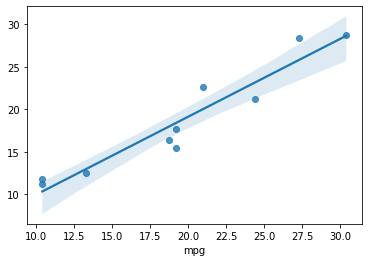

In [149]:
sns.regplot(y_test,y_pred);

In [150]:
# mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

4.156701182612996

In [151]:
#root mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)
print ("root_mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

root_mean_squared_error 2.038798955908354


In [152]:
x_train.columns

Index(['wt', 'drat', 'hp', 'am', 'gear', 'carb', 'qsec'], dtype='object')

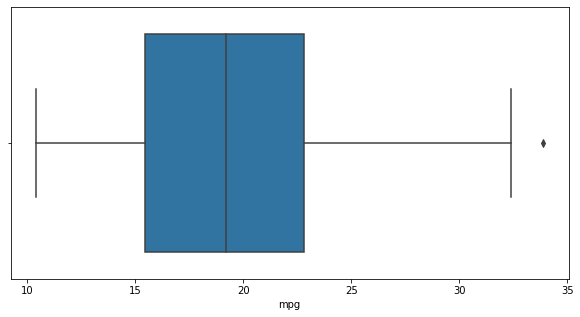

In [153]:
plt.figure(figsize = (10,5))
sns.boxplot(x=cars['mpg'])
plt.show()

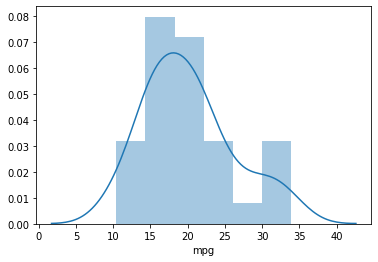

In [154]:
sns.distplot(cars['mpg']);

In [155]:
cars['mpg'].skew()

0.6723771376290805